In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
col_1=np.array([10,20,30,40,50,60,70,80,90])
col_2=np.array([15,25,35,45,55,65,75,85,95])

In [3]:
out=[]
for i in range(len(col_1)):
  out.append(col_1[i]+col_2[i])
out_col=np.array(out)

In [4]:
out_col

array([ 25,  45,  65,  85, 105, 125, 145, 165, 185])

In [5]:
out_col=col_1+col_2
out_col

array([ 25,  45,  65,  85, 105, 125, 145, 165, 185])

In [6]:
col_1=col_1.reshape(len(col_1),1)
col_2=col_2.reshape(len(col_1),1)
out_col=out_col.reshape(len(col_1),1)

In [7]:
data=np.hstack((col_1,col_2,out_col))

In [20]:
data

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [9]:
def feature_transform(n_steps,data):
  x=[]
  y=[]
  for i in range(n_steps,len(data)+1):
    x.append(data[i-n_steps:i,:-1])
    y.append(data[i-1,-1])
  return np.array(x),np.array(y)

In [10]:
n_steps=3
x,y=feature_transform(n_steps,data)

In [ ]:
x,y

In [12]:
x.shape

(7, 3, 2)

In [14]:
from keras.layers import Dense,LSTM
from keras.models import Sequential
model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(n_steps,x.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mse")

In [ ]:
history=model.fit(x,y,epochs=100)

In [18]:
#testing
xtest=np.array([[80,85],[90,95],[100,105]])
xtest=xtest.reshape((1,3,2))

In [19]:
ypred= model.predict(xtest)
ypred

array([[207.27235]], dtype=float32)

In [22]:
train=pd.read_csv("/content/sample_data/Google_Stock_Price_Train.csv")

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [25]:
xtrain=train[["Open","Close"]]

In [28]:
xtrain["Close"]=xtrain["Close"].apply(lambda x:float(x.replace(",","")))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc_xtrain=sc.fit_transform(xtrain)

In [36]:
out_col=sc_xtrain[:,0]+sc_xtrain[:,1]

In [42]:
data=np.hstack((sc_xtrain[:,0].reshape((out_col.shape[0],1)),sc_xtrain[:,1].reshape((out_col.shape[0],1)),out_col.reshape((out_col.shape[0],1))))
data

array([[0.08581368, 0.23757287, 0.32338654],
       [0.09701243, 0.24151427, 0.3385267 ],
       [0.09433366, 0.22878051, 0.32311416],
       ...,
       [0.95725128, 0.40495845, 1.36220973],
       [0.93796041, 0.40184391, 1.33980433],
       [0.93688146, 0.38672602, 1.32360748]])

In [43]:
n_steps=12
x_train,y_train=feature_transform(n_steps,data)

In [46]:
x_train.shape

(1247, 12, 2)

In [47]:
model=Sequential()
model.add(LSTM(200,activation='relu',input_shape=(n_steps,x.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mse")

In [48]:
history=model.fit(x_train,y_train,epochs=100,batch_size=30)

Epoch 1/100
42/42 [==============================] - 2s 27ms/step - loss: 0.2472
Epoch 2/100
42/42 [==============================] - 1s 26ms/step - loss: 0.0083
Epoch 3/100
42/42 [==============================] - 1s 26ms/step - loss: 0.0050
Epoch 4/100
42/42 [==============================] - 1s 28ms/step - loss: 0.0073
Epoch 5/100
42/42 [==============================] - 1s 26ms/step - loss: 0.0034
Epoch 6/100
42/42 [==============================] - 1s 27ms/step - loss: 0.0043
Epoch 7/100
42/42 [==============================] - 1s 27ms/step - loss: 0.0033
Epoch 8/100
42/42 [==============================] - 1s 26ms/step - loss: 0.0028
Epoch 9/100
42/42 [==============================] - 1s 26ms/step - loss: 0.0022
Epoch 10/100
42/42 [==============================] - 1s 27ms/step - loss: 0.0020
Epoch 11/100
42/42 [==============================] - 1s 26ms/step - loss: 0.0025
Epoch 12/100
42/42 [==============================] - 1s 27ms/step - loss: 0.0018
Epoch 13/100
42/42 [=====

Text(0, 0.5, 'Loss')

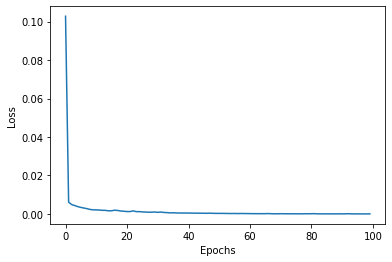

In [49]:
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [50]:
test=pd.read_csv("/content/sample_data/Google_Stock_Price_Test.csv")

In [52]:
xtest=test[["Open","Close"]]
xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   Close   20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


In [55]:
sc_xtest=sc.fit_transform(xtest)

In [80]:
out_col=sc_xtest[:,0]+sc_xtest[:,1]

In [57]:
test_data=np.hstack((sc_xtest[:,0].reshape(out_col.shape[0],1),sc_xtest[:,1].reshape(out_col.shape[0],1),out_col.reshape(out_col.shape[0],1)))

In [59]:
x_test,y_test=feature_transform(n_steps,test_data)

In [61]:
x_test.shape

(9, 12, 2)

In [62]:
ypred=model.predict(x_test)

In [77]:
final=np.hstack((ypred,y_test.reshape(-1,1)))
output=sc.inverse_transform(final)
Actual=output[:,1]
predicted=output[:,0]

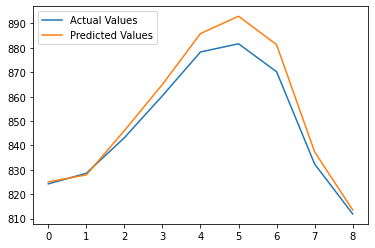

In [79]:
plt.plot(Actual,label="Actual Values")
plt.plot(predicted,label="Predicted Values")
plt.legend()